In [1]:
# Import necessary packages
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Viz
import matplotlib.pyplot
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

# Evaluation Metrics
from scipy.stats import pearsonr
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [2]:

df = pd.read_csv("data_final_with_gng.csv", encoding = "ISO-8859-1") 

In [3]:
print("COLUMN              DATATYPE       EXAMPLE")
print("----------------------------------------------------------------------")
for col in df.columns:
    print(col," "*(18-len(col)),df[col].dtype," "*(8-len(df[col].dtype)),df.iloc[8925][col])

COLUMN              DATATYPE       EXAMPLE
----------------------------------------------------------------------
Race_ID             int64          1487.0
Trap                float64          6.0
Odds                float64          7.0
BSP                 float64          8.63
Public_Estimate     float64          5.0
Last_Run            int64          9.0
Distance_All        float64          380.0
Finish_All          float64          3.13
Distance_Places_All  float64          380.0
Races_All           int64          21.0
Distance_Recent     float64          380.0
Finish_Recent       float64          2.57
Odds_Recent         float64          5.0
Early_Recent        float64          2.43
Races_380           int64          16.0
Wins_380            float64          0.25
Finish_380          float64          2.57
Odds_380            float64          5.0
Early_380           float64          2.43
Grade_380           float64          4.0
Time_380            float64          23.94
Early_Time_3

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13842 entries, 0 to 13841
Data columns (total 29 columns):
Race_ID                13842 non-null int64
Trap                   13842 non-null float64
Odds                   13842 non-null float64
BSP                    13842 non-null float64
Public_Estimate        13842 non-null float64
Last_Run               13842 non-null int64
Distance_All           13842 non-null float64
Finish_All             13842 non-null float64
Distance_Places_All    13842 non-null float64
Races_All              13842 non-null int64
Distance_Recent        13842 non-null float64
Finish_Recent          13842 non-null float64
Odds_Recent            13842 non-null float64
Early_Recent           13842 non-null float64
Races_380              13842 non-null int64
Wins_380               13842 non-null float64
Finish_380             13842 non-null float64
Odds_380               13842 non-null float64
Early_380              13842 non-null float64
Grade_380              13

#### Relativise Features

In [5]:
"""df["Early_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())['Early_Recent']
df["Finish_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())['Finish_Recent']
df["Odds_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())['Odds_Recent']
df["Early_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Early_380"]
df["Finish_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Finish_380"]
df["Odds_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Odds_380"]
df["Stay_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Stay_380"]
df["Early_Time_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Early_Time_380"]
df["Time_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Time_380"]"""

'df["Early_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())[\'Early_Recent\']\ndf["Finish_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())[\'Finish_Recent\']\ndf["Odds_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())[\'Odds_Recent\']\ndf["Early_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Early_380"]\ndf["Finish_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Finish_380"]\ndf["Odds_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Odds_380"]\ndf["Stay_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Stay_380"]\ndf["Early_Time_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Early_Time_380"]\ndf["Time_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Time_380"]'

In [6]:
factors = ['Race_ID','Trap','Odds','BSP','Public_Estimate','Last_Run','Distance_All','Finish_All',
'Distance_Places_All','Races_All','Distance_Recent','Finish_Recent','Odds_Recent','Early_Recent',
'Races_380','Wins_380','Finish_380','Odds_380','Early_380','Grade_380','Time_380','Early_Time_380',
'Stay_380','Favourite','Finished','Wide_380','Dist_By','Gng','Winner']

#### Pearson R and P-value

In [7]:
from scipy.stats import pearsonr

In [9]:
r_p = [] # Create a list of tuples with column names, r^2 and p-value. Then print them in order by p-value
for x in factors:
    result = pearsonr(df[x],df['Finished'])
    pearson_r, p__value = result[0] , result[1]
    r_p.append((x,pearson_r,p__value))
cor_p_val = sorted(r_p, key=lambda x: x[2])
for tup in cor_p_val:
    print(tup[0],(20 - len(tup[0]))*" ",round(tup[1],2),round(tup[2],2))

Finished              1.0 0.0
Winner                -0.65 0.0
BSP                   0.23 0.0
Public_Estimate       0.22 0.0
Odds                  0.21 0.0
Finish_All            0.07 0.0
Odds_380              0.06 0.0
Odds_Recent           0.06 0.0
Finish_380            0.06 0.0
Finish_Recent         0.06 0.0
Dist_By               -0.04 0.0
Stay_380              0.04 0.0
Last_Run              0.04 0.0
Distance_Recent       0.03 0.0
Early_Time_380        0.03 0.0
Distance_All          0.02 0.02
Distance_Places_All   0.02 0.05
Trap                  0.01 0.19
Races_All             0.01 0.19
Grade_380             0.01 0.33
Races_380             0.01 0.33
Wins_380              0.01 0.34
Time_380              -0.0 0.62
Early_380             -0.0 0.63
Early_Recent          0.0 0.83
Wide_380              -0.0 0.98
Favourite             -0.0 0.99
Gng                   0.0 0.99
Race_ID               0.0 0.99


In [10]:
for col in cor_p_val: # Print in order for easy copy and paste of column names to be dropped
    print("'"+col[0]+"',")

'Finished',
'Winner',
'BSP',
'Public_Estimate',
'Odds',
'Finish_All',
'Odds_380',
'Odds_Recent',
'Finish_380',
'Finish_Recent',
'Dist_By',
'Stay_380',
'Last_Run',
'Distance_Recent',
'Early_Time_380',
'Distance_All',
'Distance_Places_All',
'Trap',
'Races_All',
'Grade_380',
'Races_380',
'Wins_380',
'Time_380',
'Early_380',
'Early_Recent',
'Wide_380',
'Favourite',
'Gng',
'Race_ID',


### Training 

#### Drop Poorly Correlated

In [11]:
drop_cols = ['Winner','Public_Estimate','Odds','Race_ID','Distance_Places_All',
'Trap',
'Races_All',
'Grade_380',
'Races_380',
'Wins_380',
'Time_380',
'Early_380',
'Early_Recent',
'Wide_380',
'Favourite']
df_m = df.drop(columns=drop_cols)

In [12]:
train = df_m[0:11670]# Training
test = df_m[11670:]# Final Testing
target="Finished"

train_X = train.drop(columns=[target])
train_y = train[target]
test_X = test.drop(columns=[target])
test_y = test[target]

In [13]:
"""from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_X)
train_X_ = scaler.transform(train_X)
test_X_ = scaler.transform(test_X)
train_X = pd.DataFrame(train_X_, index=train_X.index, columns=train_X.columns)
test_X = pd.DataFrame(test_X_, index=test_X.index, columns=test_X.columns)
"""

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(train_X)\ntrain_X_ = scaler.transform(train_X)\ntest_X_ = scaler.transform(test_X)\ntrain_X = pd.DataFrame(train_X_, index=train_X.index, columns=train_X.columns)\ntest_X = pd.DataFrame(test_X_, index=test_X.index, columns=test_X.columns)\n'

In [14]:
model = LogisticRegression(random_state=0, solver='sag',max_iter=10000,multi_class='multinomial')
model.fit(train_X,train_y)
print("Training Accuracy",round(accuracy_score(train_y, model.predict(train_X)),3))

Training Accuracy 0.229


In [15]:
predicted_fin = model.predict(test_X)
print("Test Accuracy",round(accuracy_score(test_y, predicted_fin),3))

Test Accuracy 0.225


In [16]:
public_y = list(df[11670:]['Public_Estimate'])

In [17]:
print("Public Accuracy",round(accuracy_score(test_y,public_y),3))

Public Accuracy 0.212


### Accuracy for each class

In [18]:
matrix = confusion_matrix(test_y, predicted_fin)
labls = ["First","Second","Third","Fourth","Fifth","Sixth"]
acc_scores = [round(x,2) for x in list(matrix.diagonal()/matrix.sum(axis=1))]
accs = zip(labls,acc_scores)
print("Accuracy Score Each Class")
print("- - - - - - - - - - - - - - - - - - - - ")
for a in accs:
    print(a[0]," "*(9-len(a[0])),a[1])

Accuracy Score Each Class
- - - - - - - - - - - - - - - - - - - - 
First      0.58
Second     0.1
Third      0.12
Fourth     0.06
Fifth      0.09
Sixth      0.4


#### Model Weights

In [19]:
for cls in range(0,6):
    print("Linear Weigts for Classifier",cls+1)
    weights = list(np.hstack((model.intercept_[:,None], model.coef_))[cls])
    names = ["Intercept"]
    cols = list(train_X.columns)
    names = names + cols
    results = zip(names,weights)
    for x in results:
        print(x[0]," "*(20-len(x[0])),round(x[1],2))   
    print()

Linear Weigts for Classifier 1
Intercept             0.11
BSP                   -0.13
Last_Run              0.01
Distance_All          -0.0
Finish_All            -0.07
Distance_Recent       0.0
Finish_Recent         -0.01
Odds_Recent           -0.0
Finish_380            0.09
Odds_380              -0.03
Early_Time_380        0.3
Stay_380              -0.01
Dist_By               0.01
Gng                   0.0

Linear Weigts for Classifier 2
Intercept             0.06
BSP                   -0.04
Last_Run              -0.01
Distance_All          0.0
Finish_All            -0.1
Distance_Recent       -0.0
Finish_Recent         -0.01
Odds_Recent           -0.02
Finish_380            -0.01
Odds_380              0.02
Early_Time_380        0.19
Stay_380              0.0
Dist_By               -0.01
Gng                   -0.0

Linear Weigts for Classifier 3
Intercept             0.02
BSP                   0.01
Last_Run              -0.01
Distance_All          0.0
Finish_All            -0.11
Distanc

### Classification Report

In [20]:
target_names = ['first', 'second', 'third','fourth', 'fifth', 'sixth']

In [21]:
print(classification_report(test_y, predicted_fin, target_names=target_names))

              precision    recall  f1-score   support

       first       0.22      0.58      0.31       362
      second       0.23      0.10      0.14       363
       third       0.18      0.12      0.14       361
      fourth       0.19      0.06      0.09       362
       fifth       0.23      0.09      0.13       362
       sixth       0.26      0.40      0.32       362

    accuracy                           0.23      2172
   macro avg       0.22      0.23      0.19      2172
weighted avg       0.22      0.23      0.19      2172



### Mean Absolute Error

In [22]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error")
print("- - - - - - - - - - - - - - -")
print("Model: ",round(mean_absolute_error(test_y,predicted_fin),3))
print("Market:",round(mean_absolute_error(test_y,public_y),3))

Mean Absolute Error
- - - - - - - - - - - - - - -
Model:  1.922
Market: 1.681


### R-squared (Coefficient of Determination)

In [23]:
print("R-squared Score/Error")
print("- - - - - - - - - - - - - - -")
print("Model: ",round(r2_score(test_y,predicted_fin),3))
print("Market:",round(r2_score(test_y,public_y),3))

R-squared Score/Error
- - - - - - - - - - - - - - -
Model:  -1.104
Market: -0.585


### Pearson Correlation of Model Preds/Market Preds and Real Fin Position/Results

#### Model

0.044


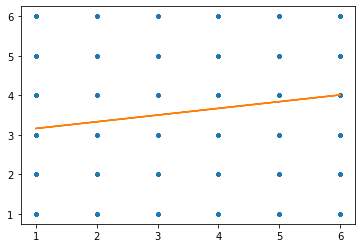

In [24]:
# Sample data
x,y = predicted_fin,test_y
print(round(pearsonr(predicted_fin,test_y)[0]**2,3))
# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

#### Public

0.043


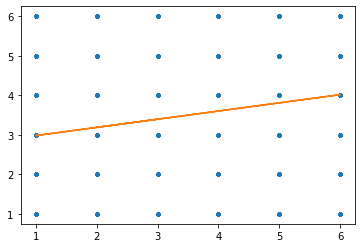

In [25]:
# Sample data
x,y = np.array(public_y), test_y
print(round(pearsonr(public_y,test_y)[0]**2,3))
# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m*x, '-')
plt.show()

In [26]:
the_dict = {'one':0,'two':0,'three':0,'four':0,'five':0,'six':0}

for x in predicted_fin:
    if x ==1:
        the_dict['one']+=1
    elif x ==2:
        the_dict['two']+=1
    elif x ==3:
        the_dict['three']+=1
    elif x ==4:
        the_dict['four']+=1
    elif x ==5:
        the_dict['five']+=1
    elif x ==6:
        the_dict['six']+=1

In [27]:
print(the_dict)

{'one': 965, 'two': 162, 'three': 230, 'four': 109, 'five': 147, 'six': 559}


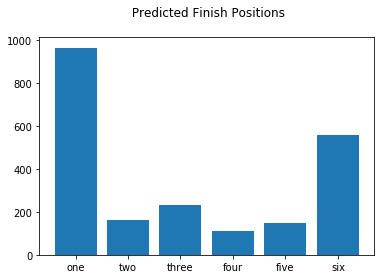

In [28]:
plt.bar(range(len(the_dict)), list(the_dict.values()), align='center')
plt.xticks(range(len(the_dict)), list(the_dict.keys()))
plt.title(" Predicted Finish Positions\n")
plt.show()

### Model Winnings

In [29]:
test_X['Model_pred'] = predicted_fin
test_X = test_X.reset_index()
test_X =test_X.drop(columns=['index'])

In [30]:
test_X['Finished'] = [x for x in test_y]
test_X['Finished_win_lose'] = np.where(test_X['Finished']==1, 1,-1)
test_X['Model_pred_win'] = np.where(test_X['Model_pred']==1, 1,0)
test_X['Returns'] = np.where(test_X['Finished']==1, 1, 0)
test_X['Returns'] = test_X['Returns']*(test_X['BSP'])
test_X['Returns'] = test_X['Returns']*test_X['Model_pred_win']
print("Model Returns:",round((test_X['Returns'].sum()/test_X['Model_pred_win'].sum())-1,2))

Model Returns: -0.08


### Market / Public Winnings

In [31]:
test_X['Market_pred'] = [x for x in df['Public_Estimate'][11670:]]
test_X['Market_pred_win'] = np.where(test_X['Market_pred']==1, 1,0)
test_X['Market_Returns'] = np.where(test_X['Finished']==1, 1, 0) # Winners only
test_X['Market_Returns'] = test_X['Market_Returns']*(test_X['BSP']) # Cash returned
test_X['Market_Returns'] = test_X['Market_Returns']*test_X['Market_pred_win'] # Only cash if predicted win
print("Market Returns:",round((test_X['Market_Returns'].sum()/test_X['Market_pred_win'].sum())-1,2))

Market Returns: -0.07


### Comparison

In [32]:
test_X['Model_pred_win'] = np.where(test_X['Model_pred']==1,1,0)
test_X['Market_not_pred'] = np.where(test_X['Market_pred']>1,1,0)
test_X['Model_pred_win'] = test_X['Model_pred_win']*test_X['Market_not_pred']
test_X['Returns'] = np.where(test_X['Finished']==1, 1, 0)
test_X['Returns'] = test_X['Returns']*(test_X['BSP'])
test_X['Returns'] = test_X['Returns']*test_X['Model_pred_win']
print("Model Returns:",round((test_X['Returns'].sum()/test_X['Model_pred_win'].sum())-1,2))

Model Returns: -0.08
